In [9]:
print("hello world")

hello world


In [10]:
# Import libraries

import altair as alt

In [11]:
%run analyzeData.ipynb

[0] : 2 csv files detected for <climateKnowledge> directory:
  [0] : pr_1901_2016_USA.csv
  [1] : tas_1901_2016_USA.csv

[1] : 8 csv files detected for <emission> directory:
  [0] : emission_agriculture.csv
  [1] : emission_all_gases.csv
  [2] : emission_all_sectors.csv
  [3] : emission_commercial.csv
  [4] : emission_electricity_generation.csv
  [5] : emission_industry.csv
  [6] : emission_residential.csv
  [7] : emission_transport.csv

[2] : 3 csv files detected for <epa> directory:
  [0] : ghg-concentrations.csv
  [1] : sea-level.csv
  [2] : snow-cover.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 136 non-null    int64  
 1   CSIRO - Adjusted sea level (inches)  134 non-null    float64
 2   CSIRO - Lower error bound (inches)   134 non-null    float64

In [12]:
df = MAIN_GRID[1][2]

# Get row
df.loc[df['Economic Sector'] == 'Agriculture']

# Get column
df['1990']

0    1527.071188
1    1875.593659
2    1628.676867
3     598.967218
4     428.668347
5     344.701666
6      33.321186
7    6437.000131
Name: 1990, dtype: float64

In [13]:
df_merged_final

alt.Chart(df_merged_final).mark_bar().encode(
    alt.X('Year_Merge:O', scale=alt.Scale(zero=False)),
    alt.Y('Tmp_Cls:Q', scale=alt.Scale(zero=False, padding=1)),
    color='Anamoly_TmpCls:Q',
    size='MLHawai_CO2ppm:Q'
)


alt.Chart(...)

In [14]:
df_merged_final

alt.Chart(df_merged_final).mark_bar().encode(
    alt.X('Year_Merge:O', scale=alt.Scale(zero=False)),
    alt.Y('Rnf_MM:Q', scale=alt.Scale(zero=False, padding=1)),
    color='Anamoly_RnfMM:Q',
    size='MLHawai_CO2ppm:Q'
)

alt.Chart(...)

In [15]:
df_merged_final

alt.Chart(df_merged_final).mark_bar().encode(
    alt.X('Year_Merge:O', scale=alt.Scale(zero=False)),
    alt.Y('CSIRO_ASLinches:Q', scale=alt.Scale(zero=False, padding=1)),
    color='Anamoly_CSIRO_ASLinches:Q',
    size='MLHawai_CO2ppm:Q'
)

alt.Chart(...)

In [16]:
# histogram plot #Normality Check
import pandas as pd
import altair as alt
import numpy as np

alt.Chart(df1_filter).mark_bar().encode(
    alt.X("Rnf_MM:Q",
          bin= True), #alt.BinParams(maxbins=100)
    y='count(*):Q'
)

alt.Chart(...)

In [17]:
#Scatter Plot # Distribution
import altair as alt
from vega_datasets import data

alt.Chart(df_merged_final).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Year_Merge:O'
).properties(
    width=150,
    height=150
).repeat(
    column=['Rnf_MM','Tmp_Cls','CSIRO_ASLinches','MLHawai_CO2ppm'],
    row=['MLHawai_CO2ppm','CSIRO_ASLinches','Tmp_Cls','Rnf_MM']
).interactive()

alt.RepeatChart(...)

In [18]:
#Scatter Plot # Distribution

import altair as alt
from vega_datasets import data

alt.Chart(df_merged_final).mark_circle().encode(
    alt.X('Year_Merge:O', scale=alt.Scale(zero=False)),
    alt.Y('Tmp_Cls:Q', scale=alt.Scale(zero=False, padding=1)),
    color='Anamoly_TmpCls:Q',
    size='MLHawai_CO2ppm:Q'
)


alt.Chart(...)

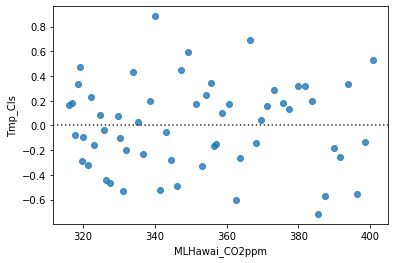

In [19]:
#residuals scatterplot to check Homoscedasticity of the attributes.
#Note-!!!Couldn't figure out in Altair so used seaborn, and matplotlib.
import seaborn as sns 
import matplotlib.pyplot as plt 
  
# draw residplot 
sns.residplot(x = "MLHawai_CO2ppm", 
              y = "Tmp_Cls", 
              data = df_merged_final) 
  
# show the plot 
plt.show() 

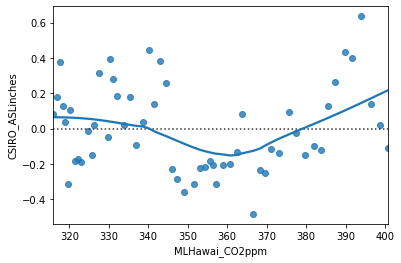

In [22]:
#residuals scatterplot to check Homoscedasticity of the attributes.
#Note-!!! Couldn't figure out in Altair so used seaborn, and matplotlib.

import seaborn as sns 
import matplotlib.pyplot as plt 
  
# draw residplot 
# with lowess = True 
sns.residplot(x = "MLHawai_CO2ppm", 
              y = "CSIRO_ASLinches", 
              data = df_merged_final, 
              lowess = True) 
  
# show the plot 
plt.show() 
